# 📊 Linear Regression - From Theory to Production

**Module 01: Regression Algorithms (Supervised Learning)**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Mathematical Foundation** - How linear regression finds the best-fit line
2. **Simple vs Multiple Regression** - Single predictor vs multiple predictors
3. **Cost Function & Optimization** - Mean Squared Error and Gradient Descent
4. **Model Evaluation** - R², MSE, RMSE, and residual analysis
5. **Production Best Practices** - Pipelines, feature scaling, and model interpretation

## 📚 Section 1: Theoretical Foundation

### What is Linear Regression?

Linear Regression models the relationship between:
- **Dependent Variable (Y)**: The target we want to predict
- **Independent Variable(s) (X)**: Features used for prediction

### The Linear Equation

**Simple Linear Regression (1 feature):**
```
ŷ = β₀ + β₁x
```

**Multiple Linear Regression (n features):**
```
ŷ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
```

Where:
- `ŷ` = Predicted value
- `β₀` = Intercept (bias term)
- `β₁, β₂, ..., βₙ` = Coefficients (weights)
- `x₁, x₂, ..., xₙ` = Feature values

---

### Cost Function: Mean Squared Error (MSE)

Linear regression minimizes the **Mean Squared Error**:

```
MSE = (1/n) Σ(yᵢ - ŷᵢ)²
```

This measures the average squared difference between actual and predicted values.

---

### How Does It Learn? (Optimization)

Scikit-learn uses **Ordinary Least Squares (OLS)** — a closed-form solution:

```
β = (XᵀX)⁻¹Xᵀy
```

This directly calculates optimal coefficients without iteration (unlike Gradient Descent).

---

### Key Assumptions of Linear Regression

1. **Linearity**: Relationship between X and Y is linear
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of residuals
4. **Normality**: Residuals are normally distributed
5. **No Multicollinearity**: Features are not highly correlated (for multiple regression)

## 🔧 Section 2: Setup & Dataset Loading

In [24]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [26]:
# Load California Housing Dataset
# This dataset has 8 features and predicts median house value
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("📊 California Housing Dataset Loaded")
print(f"Shape: {df.shape}")
print(f"\nFeatures: {list(housing.feature_names)}")
print(f"Target: {housing.target_names[0]}")
print("\n" + "="*60)
print(df.head())

📊 California Housing Dataset Loaded
Shape: (20640, 9)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: MedHouseVal

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [28]:
# Dataset Statistics
print("\n📈 Dataset Statistics:")
print(df.describe())

# Check for missing values
print(f"\n🔍 Missing Values: {df.isnull().sum().sum()}")


📈 Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min      

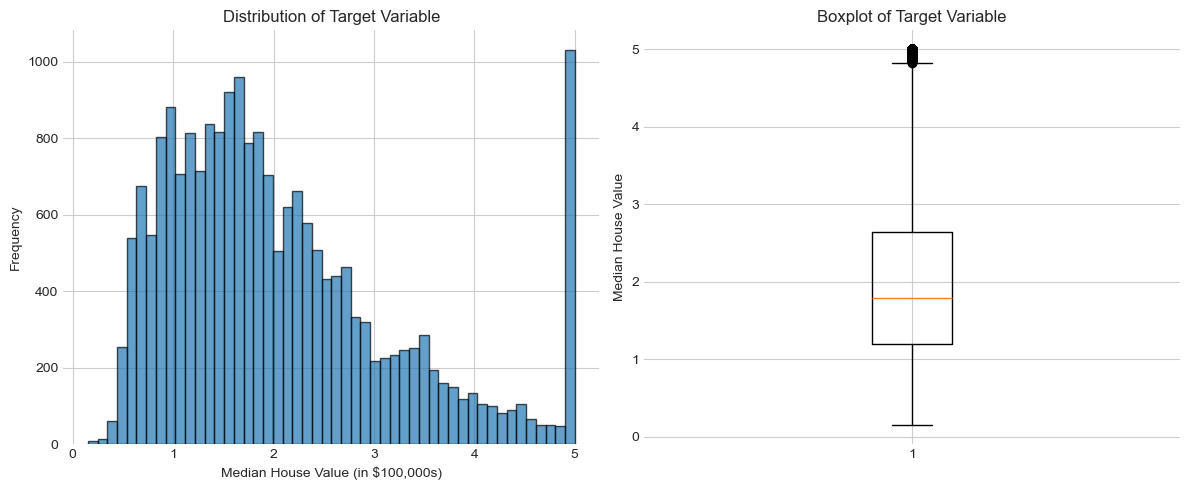

In [30]:
# Visualize Target Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Median House Value (in $100,000s)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')

plt.subplot(1, 2, 2)
plt.boxplot(df['MedHouseVal'])
plt.ylabel('Median House Value')
plt.title('Boxplot of Target Variable')

plt.tight_layout()
plt.show()

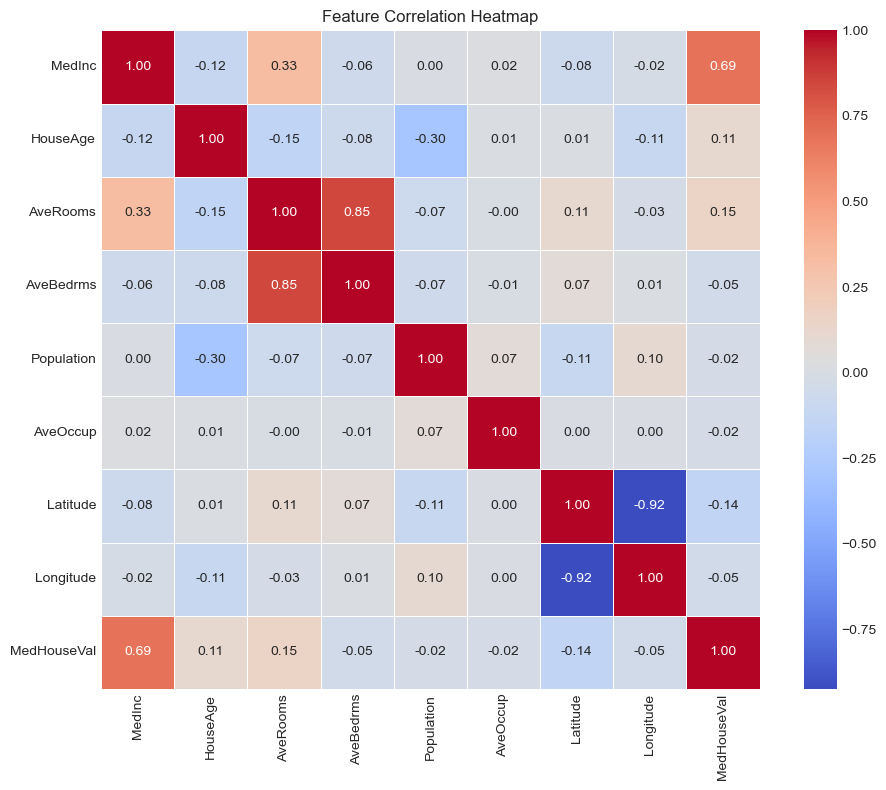


🔗 Features Correlation with Target (MedHouseVal):
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [32]:
# Feature Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Identify features most correlated with target
target_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print("\n🔗 Features Correlation with Target (MedHouseVal):")
print(target_corr)

In [34]:
# Split Features and Target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✂️ Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Feature count: {X_train.shape[1]}")


✂️ Data Split:
Training set: 16512 samples
Testing set: 4128 samples
Feature count: 8


## 🧪 Section 3: Model Training & Preprocessing

### 3.1 Simple Linear Regression (Single Feature)
 
Let's start with a simple model using only **MedInc** (Median Income), which has the highest correlation with house value.

In [38]:
# Simple Linear Regression with Single Feature
X_train_simple = X_train[['MedInc']]
X_test_simple = X_test[['MedInc']]

# Initialize and train model
simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train)

# Make predictions
y_pred_simple = simple_lr.predict(X_test_simple)

print("🎯 Simple Linear Regression Model Trained")
print(f"Intercept (β₀): {simple_lr.intercept_:.4f}")
print(f"Coefficient (β₁): {simple_lr.coef_[0]:.4f}")
print(f"\nEquation: ŷ = {simple_lr.intercept_:.4f} + {simple_lr.coef_[0]:.4f} × MedInc")

🎯 Simple Linear Regression Model Trained
Intercept (β₀): 0.4446
Coefficient (β₁): 0.4193

Equation: ŷ = 0.4446 + 0.4193 × MedInc


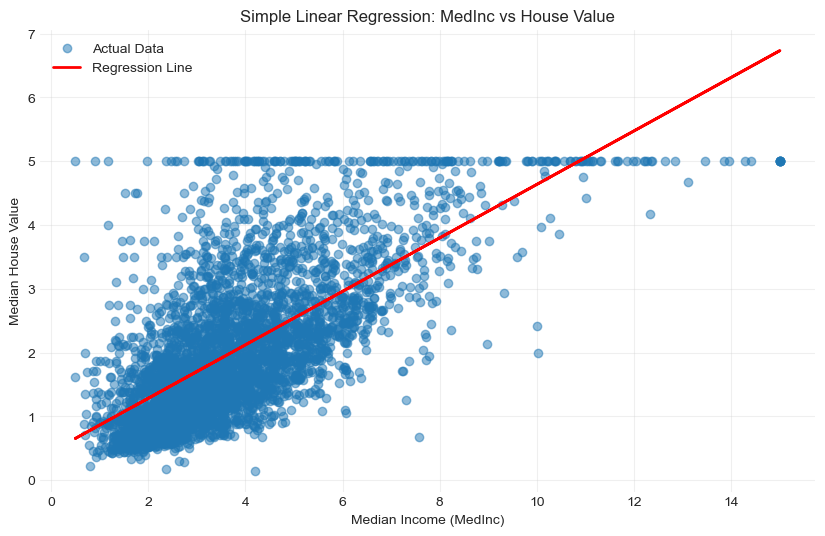

In [40]:
# Visualize Simple Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, alpha=0.5, label='Actual Data')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression: MedInc vs House Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3.2 Multiple Linear Regression (All Features)
 
Now let's use all 8 features for better predictions.

In [43]:
# Multiple Linear Regression with All Features
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Make predictions
y_pred_multiple = multiple_lr.predict(X_test)

print("🎯 Multiple Linear Regression Model Trained")
print(f"Intercept (β₀): {multiple_lr.intercept_:.4f}")
print("\n📊 Feature Coefficients (β):")

# Display coefficients in a clean format
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': multiple_lr.coef_
}).sort_values('Coefficient', ascending=False)

print(coef_df.to_string(index=False))

🎯 Multiple Linear Regression Model Trained
Intercept (β₀): -37.0233

📊 Feature Coefficients (β):
   Feature  Coefficient
 AveBedrms     0.783145
    MedInc     0.448675
  HouseAge     0.009724
Population    -0.000002
  AveOccup    -0.003526
  AveRooms    -0.123323
  Latitude    -0.419792
 Longitude    -0.433708


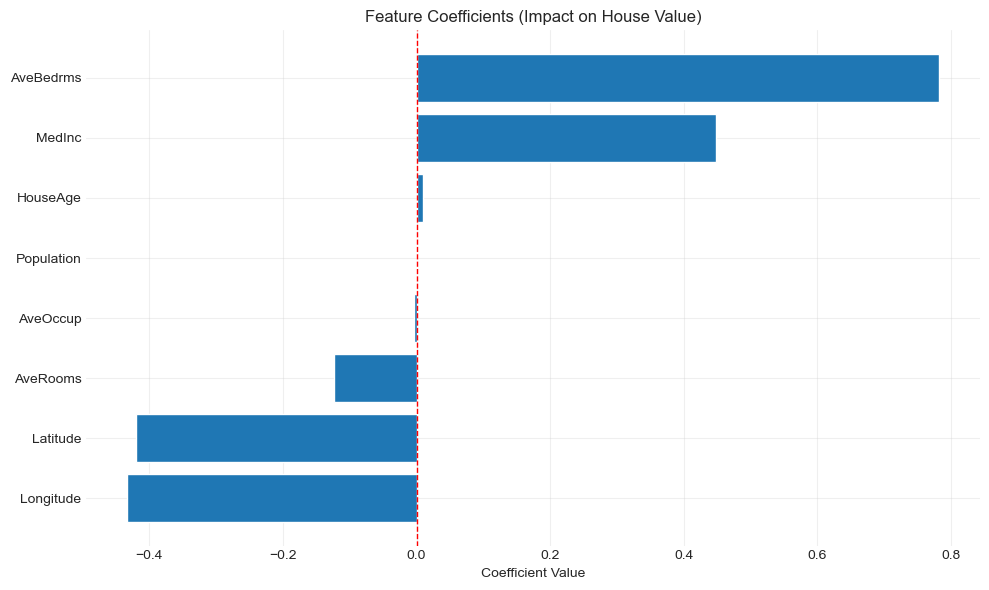

In [45]:
# Visualize Feature Importance (Coefficient Magnitude)
plt.figure(figsize=(10, 6))
coef_df_sorted = coef_df.sort_values('Coefficient')
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients (Impact on House Value)')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Feature Scaling & Standardized Regression
 
**Why Scale Features?**
 - Makes coefficients directly comparable
 - Improves numerical stability
 - Essential for regularized models (Ridge, Lasso)

In [58]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on scaled data
scaled_lr = LinearRegression()
scaled_lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_scaled = scaled_lr.predict(X_test_scaled)

print("🎯 Standardized Linear Regression Model Trained")
print(f"Intercept: {scaled_lr.intercept_:.4f}")
print("\n📊 Standardized Coefficients:")

scaled_coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Std_Coefficient': scaled_lr.coef_
}).sort_values('Std_Coefficient', key=abs, ascending=False)

print(scaled_coef_df.to_string(index=False))

🎯 Standardized Linear Regression Model Trained
Intercept: 2.0719

📊 Standardized Coefficients:
   Feature  Std_Coefficient
  Latitude        -0.896929
 Longitude        -0.869842
    MedInc         0.854383
 AveBedrms         0.339259
  AveRooms        -0.294410
  HouseAge         0.122546
  AveOccup        -0.040829
Population        -0.002308


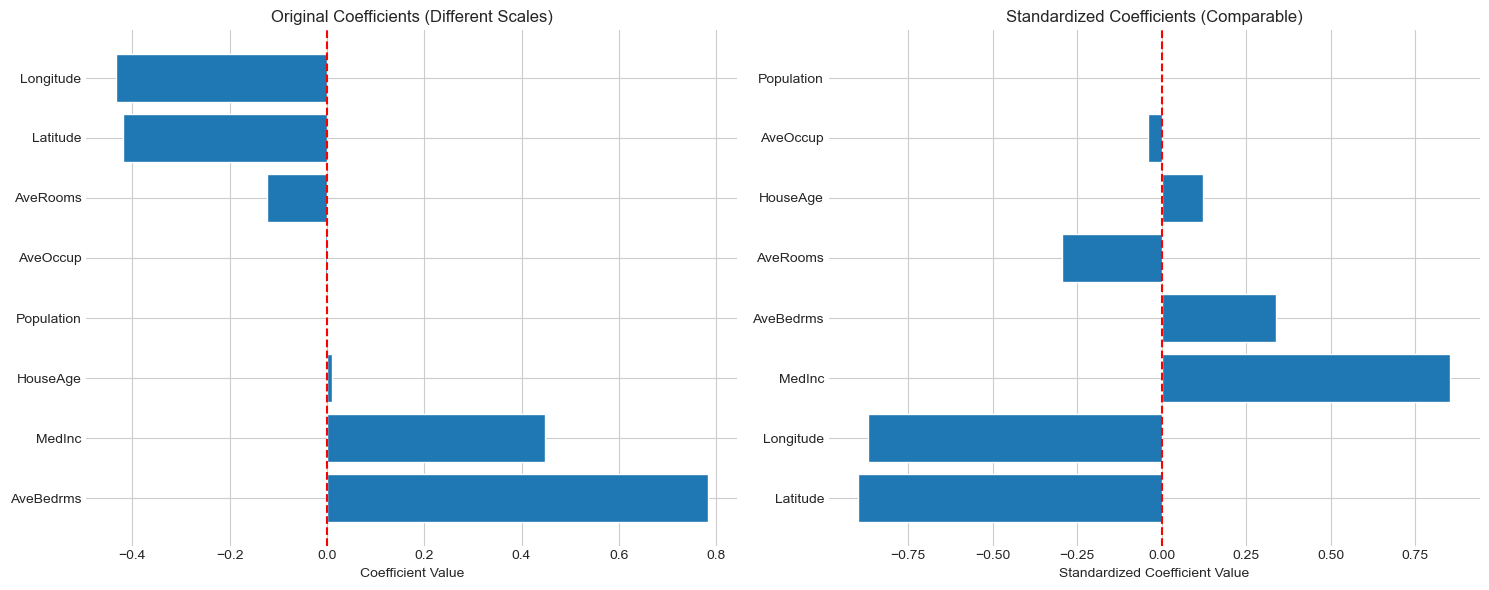

In [60]:
# Compare coefficient magnitudes
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original coefficients
axes[0].barh(coef_df['Feature'], coef_df['Coefficient'])
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Original Coefficients (Different Scales)')
axes[0].axvline(x=0, color='red', linestyle='--')

# Standardized coefficients
axes[1].barh(scaled_coef_df['Feature'], scaled_coef_df['Std_Coefficient'])
axes[1].set_xlabel('Standardized Coefficient Value')
axes[1].set_title('Standardized Coefficients (Comparable)')
axes[1].axvline(x=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

## 📊 Section 4: Model Evaluation & Metrics

### 4.1 Regression Metrics Explained

**1. R² Score (Coefficient of Determination)**
- Range: -∞ to 1 (1 is perfect)
- Interpretation: % of variance explained by the model
- Formula: `R² = 1 - (SS_res / SS_tot)`

**2. Mean Squared Error (MSE)**
- Measures average squared prediction error
- Sensitive to outliers
- Formula: `MSE = (1/n) Σ(y - ŷ)²`

**3. Root Mean Squared Error (RMSE)**
- Square root of MSE
- Same units as target variable
- Formula: `RMSE = √MSE`

**4. Mean Absolute Error (MAE)**
- Average absolute prediction error
- Less sensitive to outliers than MSE
- Formula: `MAE = (1/n) Σ|y - ŷ

In [64]:
# Evaluate all three models
def evaluate_model(y_true, y_pred, model_name):
    """Calculate and display regression metrics"""
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{'='*60}")
    print(f"📈 {model_name} Performance Metrics")
    print(f"{'='*60}")
    print(f"R² Score:  {r2:.4f} (Higher is better, max=1.0)")
    print(f"MSE:       {mse:.4f}")
    print(f"RMSE:      {rmse:.4f} (Same units as target)")
    print(f"MAE:       {mae:.4f} (Average absolute error)")
    
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Evaluate all models
simple_metrics = evaluate_model(y_test, y_pred_simple, "Simple Linear Regression (1 Feature)")
multiple_metrics = evaluate_model(y_test, y_pred_multiple, "Multiple Linear Regression (8 Features)")
scaled_metrics = evaluate_model(y_test, y_pred_scaled, "Standardized Linear Regression")


📈 Simple Linear Regression (1 Feature) Performance Metrics
R² Score:  0.4589 (Higher is better, max=1.0)
MSE:       0.7091
RMSE:      0.8421 (Same units as target)
MAE:       0.6299 (Average absolute error)

📈 Multiple Linear Regression (8 Features) Performance Metrics
R² Score:  0.5758 (Higher is better, max=1.0)
MSE:       0.5559
RMSE:      0.7456 (Same units as target)
MAE:       0.5332 (Average absolute error)

📈 Standardized Linear Regression Performance Metrics
R² Score:  0.5758 (Higher is better, max=1.0)
MSE:       0.5559
RMSE:      0.7456 (Same units as target)
MAE:       0.5332 (Average absolute error)



📊 Model Comparison Summary:
      Simple LR  Multiple LR  Scaled LR
R2     0.458859     0.575788   0.575788
MSE    0.709116     0.555892   0.555892
RMSE   0.842090     0.745581   0.745581
MAE    0.629909     0.533200   0.533200


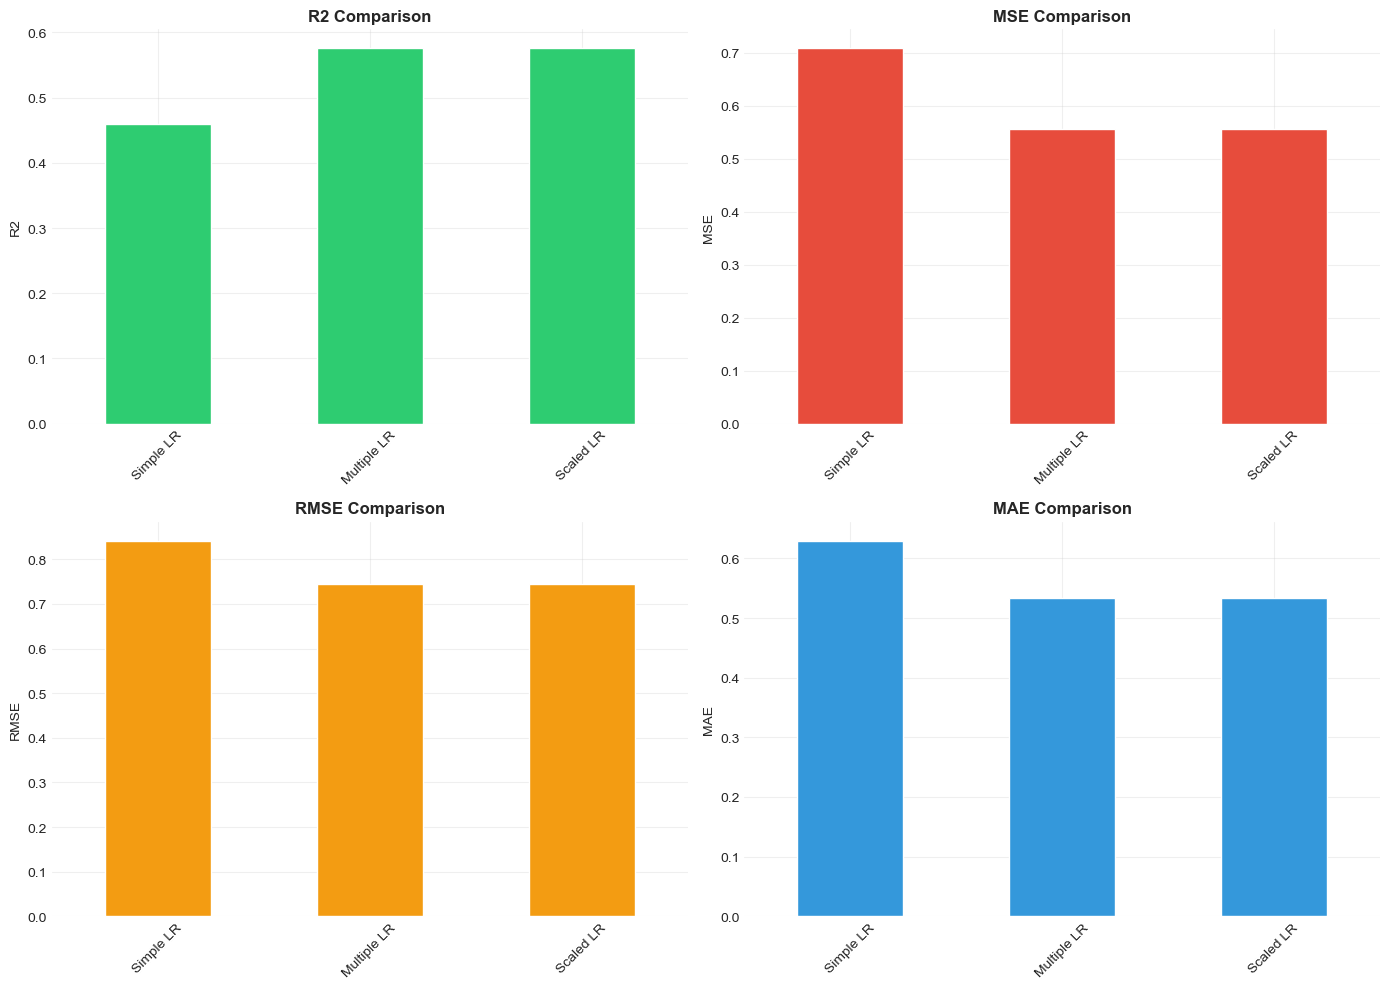

In [66]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Simple LR': simple_metrics,
    'Multiple LR': multiple_metrics,
    'Scaled LR': scaled_metrics
})

print("\n📊 Model Comparison Summary:")
print(comparison_df)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['R2', 'MSE', 'RMSE', 'MAE']
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    comparison_df.loc[metric].plot(kind='bar', ax=ax, color=colors[idx])
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric)
    ax.set_xlabel('')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Prediction vs Actual Values

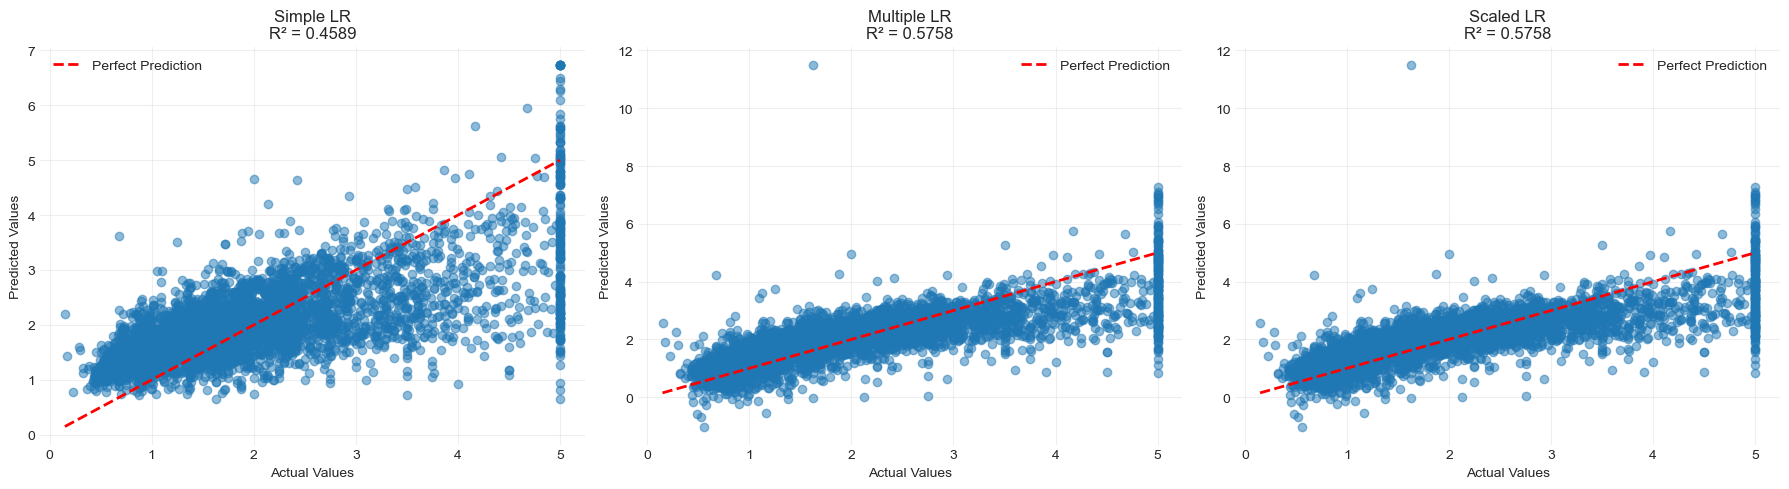

In [69]:
# Scatter plot: Predictions vs Actual
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = [
    ('Simple LR', y_pred_simple),
    ('Multiple LR', y_pred_multiple),
    ('Scaled LR', y_pred_scaled)
]

for idx, (name, predictions) in enumerate(models):
    axes[idx].scatter(y_test, predictions, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], 
                   [y_test.min(), y_test.max()], 
                   'r--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')
    axes[idx].set_title(f'{name}\nR² = {r2_score(y_test, predictions):.4f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.3 Residual Analysis

**Residuals** = Actual - Predicted

Good residual plots should show:
- Random scatter (no patterns)
- Mean near zero
- Constant variance (homoscedasticity)

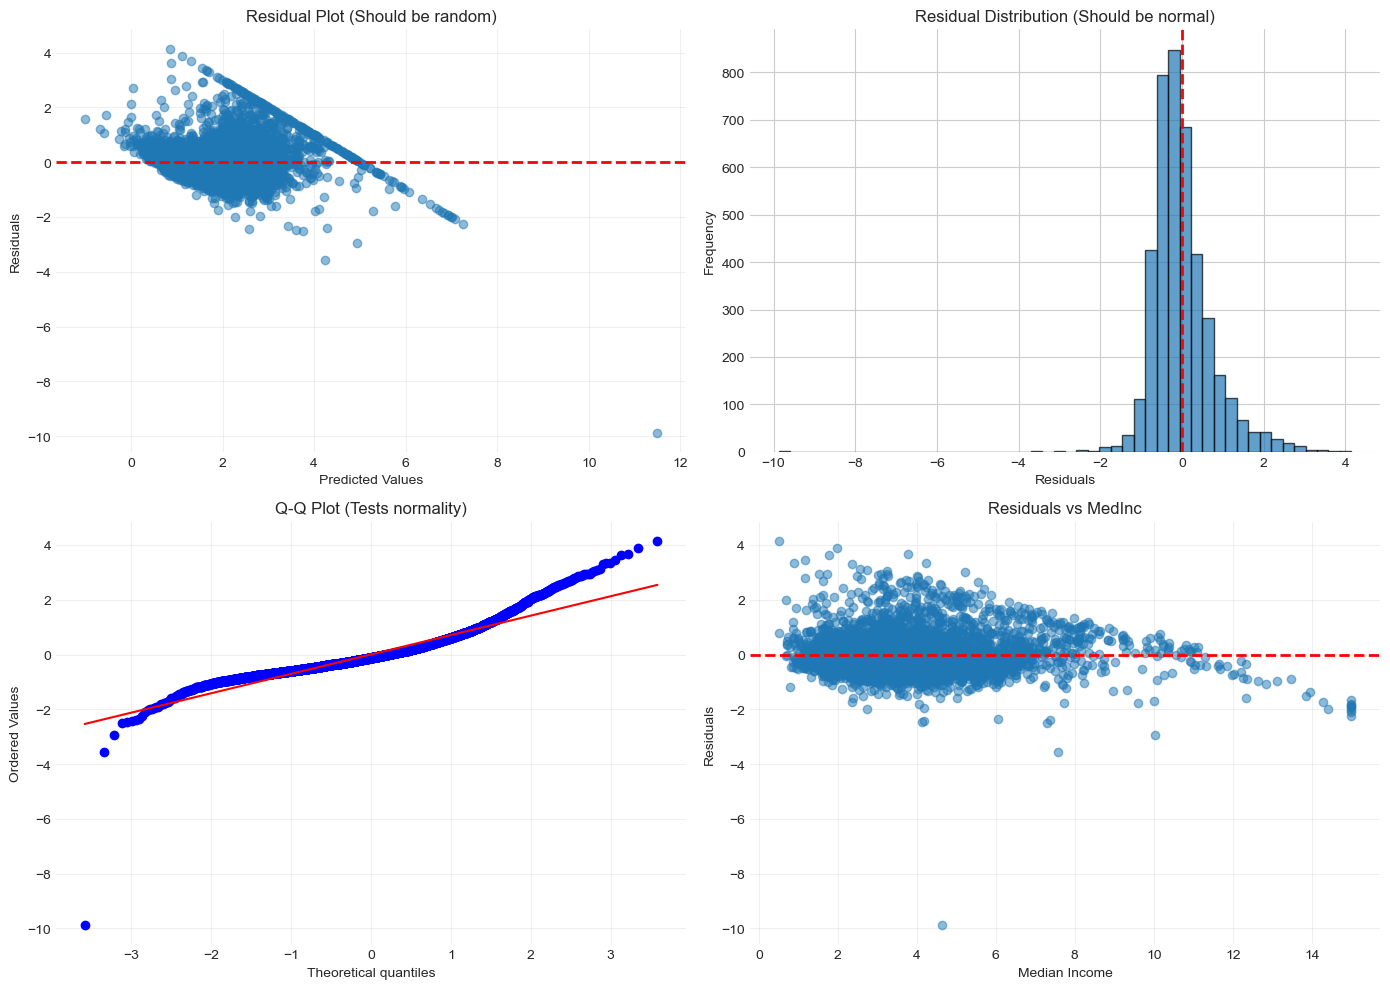


📊 Residual Statistics:
Mean: 0.003479 (Should be ~0)
Std Dev: 0.7457
Min: -9.8753
Max: 4.1484


In [72]:
# Calculate residuals for multiple regression
residuals = y_test - y_pred_multiple

# Residual plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Predicted Values
axes[0, 0].scatter(y_pred_multiple, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot (Should be random)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram of Residuals
axes[0, 1].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Residuals')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Residual Distribution (Should be normal)')

# 3. Q-Q Plot (Normality test)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Tests normality)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals vs Feature (MedInc)
axes[1, 1].scatter(X_test['MedInc'], residuals, alpha=0.5)
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Median Income')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs MedInc')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Residual Statistics:")
print(f"Mean: {residuals.mean():.6f} (Should be ~0)")
print(f"Std Dev: {residuals.std():.4f}")
print(f"Min: {residuals.min():.4f}")
print(f"Max: {residuals.max():.4f}")

### 4.4 Cross-Validation

**Why Cross-Validation?**
- Reduces overfitting risk
- Provides more reliable performance estimate
- Uses all data for both training and validation


🔄 5-Fold Cross-Validation Results:
R² Scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Mean R²: 0.6115
Std Dev: 0.0065


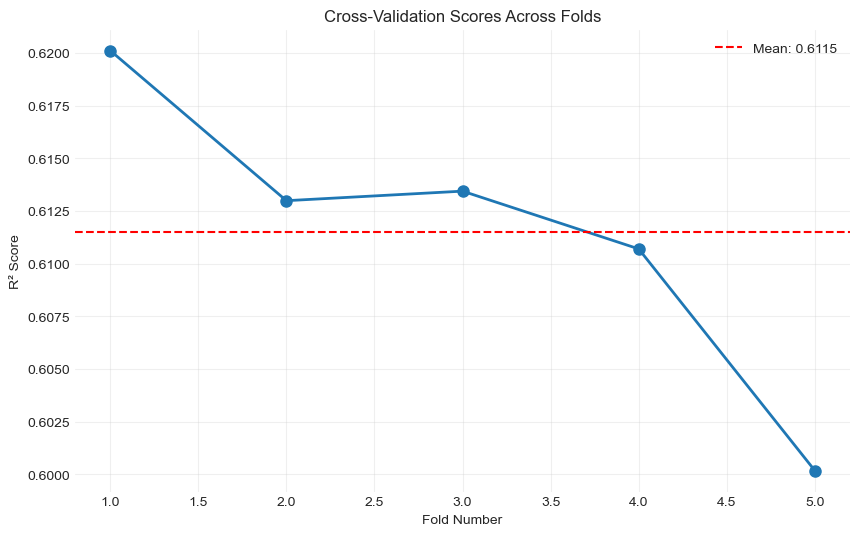

In [75]:
# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(
    LinearRegression(), 
    X_train_scaled, 
    y_train, 
    cv=5, 
    scoring='r2'
)

print("\n🔄 5-Fold Cross-Validation Results:")
print(f"R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f}")
print(f"Std Dev: {cv_scores.std():.4f}")

# Visualize CV scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold Number')
plt.ylabel('R² Score')
plt.title('Cross-Validation Scores Across Folds')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 🚀 Section 5: Model Interpretation & Production Best Practices

### 5.1 Feature Importance Analysis
 
In linear regression, **coefficient magnitude** (after scaling) indicates feature importance.


🔍 Feature Importance Ranking:
   Feature  Importance  Coefficient
  Latitude    0.896929    -0.896929
 Longitude    0.869842    -0.869842
    MedInc    0.854383     0.854383
 AveBedrms    0.339259     0.339259
  AveRooms    0.294410    -0.294410
  HouseAge    0.122546     0.122546
  AveOccup    0.040829    -0.040829
Population    0.002308    -0.002308


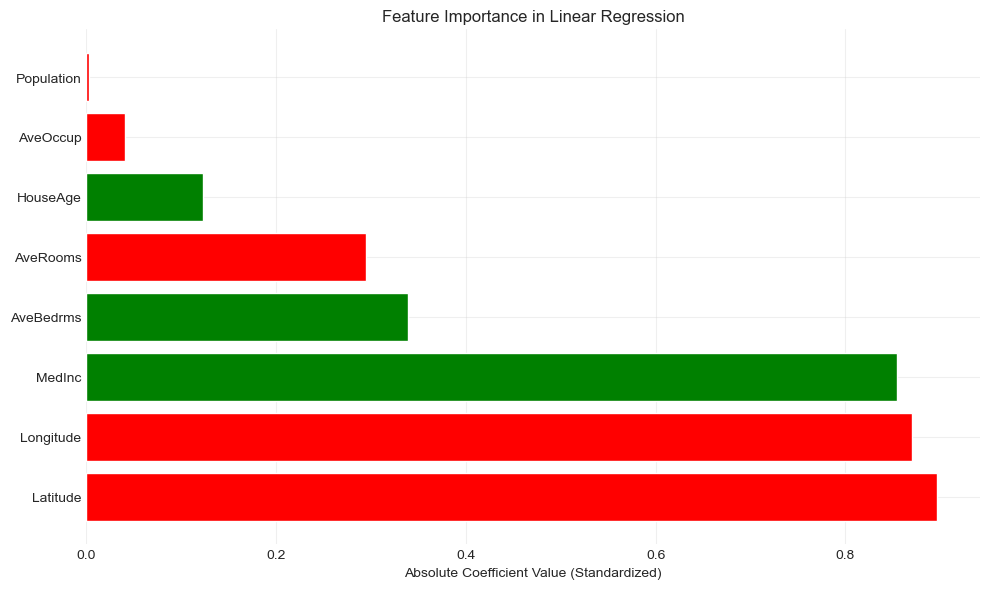

In [79]:
# Feature importance based on standardized coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(scaled_lr.coef_),
    'Coefficient': scaled_lr.coef_
}).sort_values('Importance', ascending=False)

print("\n🔍 Feature Importance Ranking:")
print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color=['green' if x > 0 else 'red' for x in feature_importance['Coefficient']])
plt.xlabel('Absolute Coefficient Value (Standardized)')
plt.title('Feature Importance in Linear Regression')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.2 Bias-Variance Tradeoff

**Linear Regression** typically has:
- ✅ **Low Variance**: Stable predictions across different datasets
- ⚠️ **High Bias**: May underfit complex non-linear relationships

**When to use Linear Regression:**
- Linear relationships between features and target
- Need for interpretability
- Small to medium datasets
- Baseline model for comparis

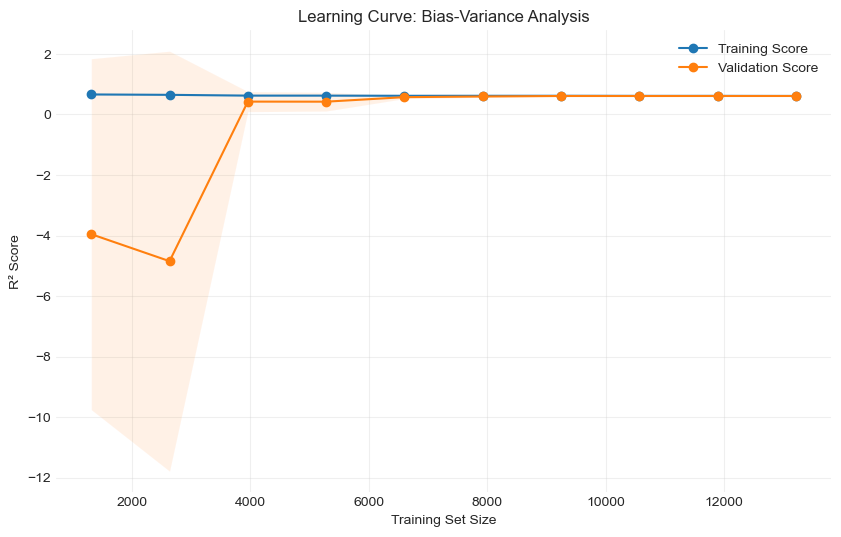

In [82]:
# Demonstrate learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(),
    X_train_scaled,
    y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2',
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, val_mean, label='Validation Score', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve: Bias-Variance Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 5.3 Production-Ready Pipeline

**Best Practice:** Always use `Pipeline` to prevent data leakage and ensure reproducibility.

In [85]:
from sklearn.pipeline import Pipeline

# Create production pipeline
production_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train pipeline
production_pipeline.fit(X_train, y_train)

# Predict
y_pred_pipeline = production_pipeline.predict(X_test)

# Evaluate
pipeline_r2 = r2_score(y_test, y_pred_pipeline)
pipeline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_pipeline))

print("\n🚀 Production Pipeline Results:")
print(f"R² Score: {pipeline_r2:.4f}")
print(f"RMSE: {pipeline_rmse:.4f}")


🚀 Production Pipeline Results:
R² Score: 0.5758
RMSE: 0.7456


In [87]:
# Save model for deployment (optional)
import joblib

# Save pipeline
joblib.dump(production_pipeline, 'linear_regression_pipeline.pkl')
print("\n💾 Model saved as 'linear_regression_pipeline.pkl'")

# Load and test
loaded_pipeline = joblib.load('linear_regression_pipeline.pkl')
test_prediction = loaded_pipeline.predict(X_test[:5])

print("\n🧪 Testing Loaded Model:")
print("First 5 predictions:", test_prediction)
print("Actual values:", y_test[:5].values)


💾 Model saved as 'linear_regression_pipeline.pkl'

🧪 Testing Loaded Model:
First 5 predictions: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Actual values: [0.477   0.458   5.00001 2.186   2.78   ]


### 5.4 Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **Simple vs Multiple Regression**: Multiple features → better predictions
2. **Feature Scaling**: Essential for comparing coefficients
3. **Evaluation Metrics**: R², MSE, RMSE, MAE
4. **Residual Analysis**: Check assumptions visually
5. **Cross-Validation**: More reliable performance estimates
6. **Production Pipelines**: Prevent data leakage, ensure reproducibility

### 🚀 When to Use Linear Regression:

| **Use Case** | **Reason** |
|--------------|------------|
| Baseline Model | Quick benchmark for more complex models |
| Interpretability Needed | Coefficients clearly show feature impact |
| Linear Relationships | Works well when assumptions are met |
| Small Datasets | Doesn't require massive amounts of data |

#### ⚠️ Limitations:

- Cannot capture non-linear relationships
- Sensitive to outliers
- Assumes linear relationships
- No built-in regularization (see Ridge/Lasso for that!)

#### 📚 Next Steps:

1. **Notebook 02: Ridge, Lasso, ElasticNet** - Add regularization to prevent overfitting
2. **Notebook 03: SVR** - Handle non-linear relationships with kernels
3. **Notebook 04: KNN Regression** - Non-parametric alternative

---

### 🎓 Practice Exercises:

1. Load `load_diabetes()` dataset and build a linear regression model
2. Add polynomial features using `PolynomialFeatures` for non-linear fits
3. Compare performance with/without feature scaling
4. Experiment with different train-test split ratios
5. Try feature selection (removing low-importance features)

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT